# Task 1: <font color =Green> *Clustering*</font> to understand the distribution of dugwells across the country.

In [62]:
# importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### Setting path locations and other initializations for <font color =red> *Aggregation*<font>

In [63]:
# identifier for aggregating the data as per the requirement 

level = 'State'
# enter 'State' 'District' 'Block/Tehsil' or 'Village' in level as per the requirement

In [134]:
# setting path for the relevant locations

current_dir = os.getcwd()                      # current working directory
parent_dir = os.path.dirname(current_dir)      # parent directory
data_set = parent_dir+'/data'                  # setting the path for data directory
plots = parent_dir+'/plots'                     # setting the path for plot directory

In [65]:
# used datasets

no_of_dugwells = data_set + '/mi_census5_13-14_Table1.1 (1).csv'     # number of dugwells at each level containing 'Pucca' 'Kutcha' 'Dug-cum bore well' and 'Others' 
owner_caste = data_set + '/mi_census5_13-14_Table.1.3.csv'           # caste aggregated owners of dugwells at each level containing 'No. of Dugwells owned by - Scheduled Caste','No. of Dugwells owned by - Scheduled tribe','No. of Dugwells owned by - OBC','No. of Dugwells owned by - Others','No. of Dugwells Owned by - other than individual farmer (incl. Public & Group of farmers)'
average_cost = data_set + '/mi_census5_13-14_Table.1.5 (1).csv'      # average cost of dugwell at each level containing 'Number' , 'Cost' and 'Average'
dugwell_depth = data_set + '/mi_census5_13-14_Table1.17.csv'         # average dugwell depth at each level 
pumping_hrs = data_set + '/mi_census5_13-14_Table1.16.csv'           # average number of pumping hours per day at each level
fund_govt = data_set + '/mi_census5_13-14_Table1.7.csv'              # proportion of the dugwells funded by the government at each level
energy_source = data_set + '/mi_census5_13-14_Table1.13.csv'         # 

## Data for number of dugwells at each level - <font color=blue> *depth_number*</font>

In [66]:
# no of wells get aggreagated based on the value set in level identifier declared in BLOCK 2

data_1 = pd.read_csv(no_of_dugwells)
dugwell_number = data_1.groupby(level)['Pucca','Kutcha','Dug-cum bore well','Others'].sum()

dugwell_number

,Pucca,Kutcha,Dug-cum bore well,Others
State,,,,
ANDAMAN & NICOBARS,882,434,0,18
ANDHRA PRADESH,123979,70264,15279,2508
ARUNACHAL PRADESH,3,17,1,0
ASSAM,13,35,3,164
BIHAR,8757,3284,9500,1336
CHHATISGARH,16319,1536,27929,1827
GOA,3891,766,7,9
GUJARAT,865526,39417,26346,978
HARYANA,14,0,5,9


In [67]:
import missingno

## Data for depth of dugwells at each level - <font color=blue> *depth_dugwell*</font>

In [68]:
# reading the depth of dugwell based on the value set in level identifier declared in BLOCK 2

data_1 = pd.read_csv(dugwell_depth)
dataf = data_1.groupby(level)['No. by the depth of dugwell - 0 to 20 mts','No. by the depth of dugwell - 20 to 40 mts','No. by the depth of dugwell - 40 to 60 mts','No. by the depth of dugwell - 60 to 70 mts','No. by the depth of dugwell - >70 mts'].sum()

#calculating the average depth of dugwells

dataf['Depth'] = (10*dataf['No. by the depth of dugwell - 0 to 20 mts']+30*dataf['No. by the depth of dugwell - 20 to 40 mts']+50*dataf['No. by the depth of dugwell - 40 to 60 mts']+65*dataf['No. by the depth of dugwell - 60 to 70 mts']+80*dataf['No. by the depth of dugwell - >70 mts'])
dataf['Depth'] = dataf['Depth']/(dataf['No. by the depth of dugwell - 0 to 20 mts']+dataf['No. by the depth of dugwell - 20 to 40 mts']+dataf['No. by the depth of dugwell - 40 to 60 mts']+dataf['No. by the depth of dugwell - 60 to 70 mts']+dataf['No. by the depth of dugwell - >70 mts'])
depth_dugwell = dataf

depth_dugwell

,No. by the depth of dugwell - 0 to 20 mts,No. by the depth of dugwell - 20 to 40 mts,No. by the depth of dugwell - 40 to 60 mts,No. by the depth of dugwell - 60 to 70 mts,No. by the depth of dugwell - >70 mts,Depth
State,,,,,,
ANDAMAN & NICOBARS,1301,25,2,5,1,10.693403
ANDHRA PRADESH,180943,20387,4401,1136,5163,14.752488
ARUNACHAL PRADESH,20,0,0,0,1,13.333333
ASSAM,15,149,0,0,51,40.465116
BIHAR,18987,2448,545,173,724,15.724308
CHHATISGARH,42746,2717,405,270,1473,13.959169
GOA,4669,3,0,0,1,10.027819
GUJARAT,852097,78243,1115,165,647,11.784709
HARYANA,17,3,1,1,6,30.535714


In [69]:
# creating a final dataset containing average depth of dugwells

final_dataset = depth_dugwell[['Depth']].copy()
final_dataset

,Depth
State,
ANDAMAN & NICOBARS,10.693403
ANDHRA PRADESH,14.752488
ARUNACHAL PRADESH,13.333333
ASSAM,40.465116
BIHAR,15.724308
CHHATISGARH,13.959169
GOA,10.027819
GUJARAT,11.784709
HARYANA,30.535714


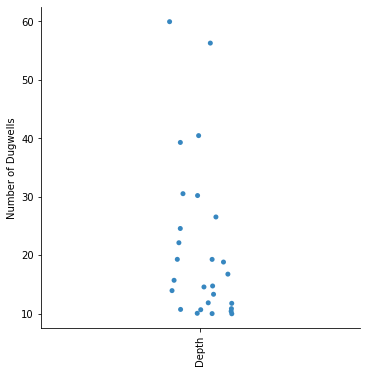

In [70]:
#plotting scatter plot to visualize the distribution of depth og dugwells

fig = sns.catplot(data = final_dataset,palette=("Blues_d"))
plt.xticks(rotation=90)
plt.ylabel('Number of Dugwells')

# saving the plotted graph in plot directory
name = '/depth_number_'+level+'.png'
plt.savefig(plots+name)

In [71]:
#adding the total number of dugwells in final dataset

final_dataset['Number'] = (dugwell_number['Pucca']+dugwell_number['Kutcha']+dugwell_number['Dug-cum bore well']+dugwell_number['Others']).astype(int)
final_dataset

,Depth,Number
State,,
ANDAMAN & NICOBARS,10.693403,1334
ANDHRA PRADESH,14.752488,212030
ARUNACHAL PRADESH,13.333333,21
ASSAM,40.465116,215
BIHAR,15.724308,22877
CHHATISGARH,13.959169,47611
GOA,10.027819,4673
GUJARAT,11.784709,932267
HARYANA,30.535714,28


## Data for caste of owner of dugwells at each level - <font color = blue>*dugwell_owner_caste*</font>

In [72]:
# no of wells get aggreagated based on the value set in level identifier declared in BLOCK 2

data_2 = pd.read_csv(owner_caste)
dugwell_owner_caste = data_2.groupby(level)['No. of Dugwells owned by - Scheduled Caste','No. of Dugwells owned by - Scheduled tribe','No. of Dugwells owned by - OBC','No. of Dugwells owned by - Others','No. of Dugwells Owned by - other than individual farmer (incl. Public & Group of farmers)'].sum()

dugwell_owner_caste.columns = ['SC','ST','OBC','Others','Public or Group']
dugwell_owner_caste

,SC,ST,OBC,Others,Public or Group
State,,,,,
ANDAMAN & NICOBARS,6,55,437,342,494
ANDHRA PRADESH,16185,5273,98634,75994,15944
ARUNACHAL PRADESH,0,0,0,0,21
ASSAM,5,18,17,89,86
BIHAR,2077,1751,10527,4525,3997
CHHATISGARH,3032,22366,18735,2228,1250
GOA,63,685,972,2547,406
GUJARAT,36311,85685,317786,482185,10300
HARYANA,0,0,0,9,19


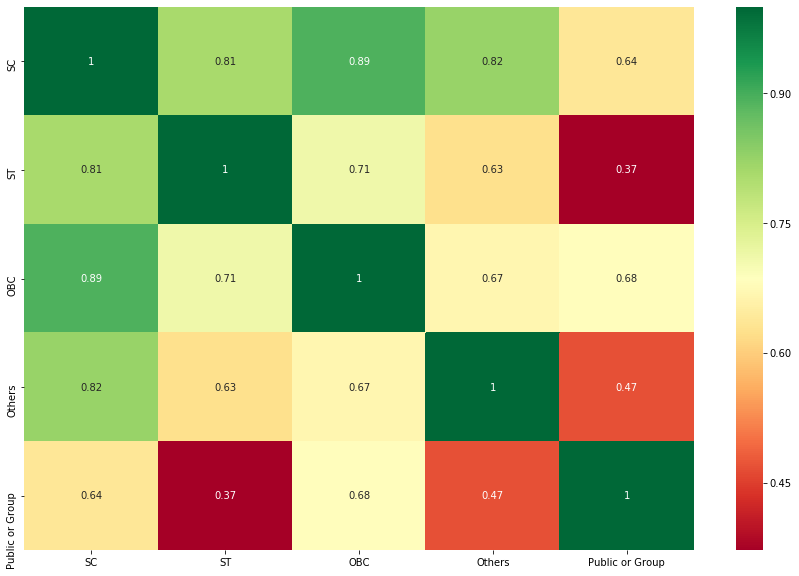

In [102]:
corr = dugwell_owner_caste.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
# plot heat map
g=sns.heatmap(dugwell_owner_caste[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# saving the plotted graph in plot directory
name = '/heatmap_caste.png'
plt.savefig(plots+name)

In [74]:
#adding OBC values to final dataset

final_dataset['OBC'] = dugwell_owner_caste['OBC']/(final_dataset['Number'])
final_dataset

,Depth,Number,OBC
State,,,
ANDAMAN & NICOBARS,10.693403,1334,0.327586
ANDHRA PRADESH,14.752488,212030,0.465189
ARUNACHAL PRADESH,13.333333,21,0.000000
ASSAM,40.465116,215,0.079070
BIHAR,15.724308,22877,0.460156
CHHATISGARH,13.959169,47611,0.393502
GOA,10.027819,4673,0.208003
GUJARAT,11.784709,932267,0.340874
HARYANA,30.535714,28,0.000000


In [75]:
# adding Public or Group owned values in final dataset

final_dataset['Public or Group owned'] = dugwell_owner_caste['Public or Group']/(final_dataset['Number'])
final_dataset

,Depth,Number,OBC,Public or Group owned
State,,,,
ANDAMAN & NICOBARS,10.693403,1334,0.327586,0.370315
ANDHRA PRADESH,14.752488,212030,0.465189,0.075197
ARUNACHAL PRADESH,13.333333,21,0.000000,1.000000
ASSAM,40.465116,215,0.079070,0.400000
BIHAR,15.724308,22877,0.460156,0.174717
CHHATISGARH,13.959169,47611,0.393502,0.026254
GOA,10.027819,4673,0.208003,0.086882
GUJARAT,11.784709,932267,0.340874,0.011048
HARYANA,30.535714,28,0.000000,0.678571


## Data for energy source of dugwells at each level - <font color = blue>*dugwell_energy*</font>

In [106]:
#reading the data for energy source for dugwells

data_1 = pd.read_csv(energy_source)
data_1.columns = ['State','District','Block/Tehsil','Village','Electric Pump','Diesel Pump','Wind Mills','Solar Pumps','Manual/Animal','Other one','One Source','Electric & Diesel','Electric & Windmill','Electric & Solar','Diesel & Windmills','Diesel & Solar','Windmill & Solar','Other two','Two Source']

dugwell_energy = data_1.groupby(level)['Electric Pump','Diesel Pump','Wind Mills','Solar Pumps','Manual/Animal','Other one','One Source','Electric & Diesel','Electric & Windmill','Electric & Solar','Diesel & Windmills','Diesel & Solar','Windmill & Solar','Other two','Two Source'].sum()
dugwell_energy

,Electric Pump,Diesel Pump,Wind Mills,Solar Pumps,Manual/Animal,Other one,One Source,Electric & Diesel,Electric & Windmill,Electric & Solar,Diesel & Windmills,Diesel & Solar,Windmill & Solar,Other two,Two Source
State,,,,,,,,,,,,,,,
ANDAMAN & NICOBARS,637,105,2,1,567,2,1314,3,0,0,0,0,0,14,17
ANDHRA PRADESH,86044,38274,442,57,1906,18924,145647,2404,9,9,25,37,0,3072,5556
ARUNACHAL PRADESH,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0
ASSAM,12,195,0,0,1,0,208,0,0,0,1,0,0,4,5
BIHAR,2662,12317,64,17,80,550,15690,4681,60,37,78,37,9,2189,7091
CHHATISGARH,38524,2637,4,32,4349,178,45724,690,36,107,9,17,1,1020,1880
GOA,3148,251,1,0,1053,140,4593,6,0,0,0,0,0,11,17
GUJARAT,902634,10160,47,1,738,1140,914720,13768,15,1,4,5,0,312,14105
HARYANA,22,2,0,0,0,0,24,3,0,0,0,0,0,1,4


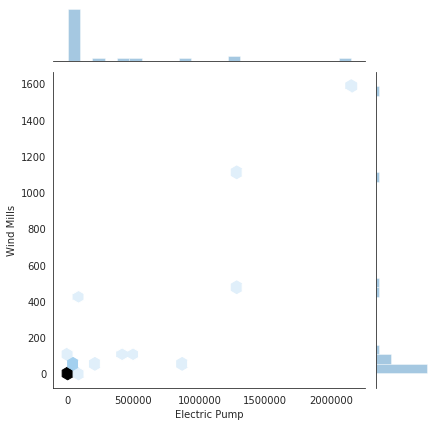

In [108]:
with sns.axes_style('white'):
    sns.jointplot("Electric Pump", "Wind Mills", data=dugwell_energy, kind='hex')
# saving the plotted graph in plot directory
name = '/correlation_WindMills_ElecticPump.png'
plt.savefig(plots+name)

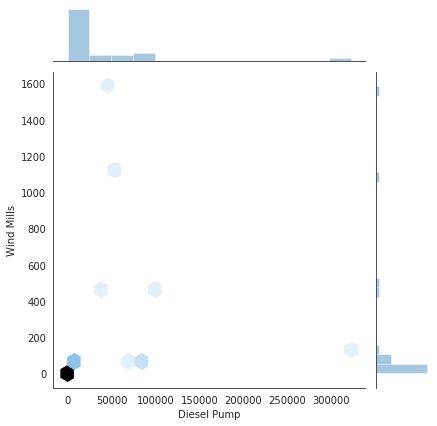

In [109]:
with sns.axes_style('white'):
    sns.jointplot("Diesel Pump","Wind Mills",  data=dugwell_energy, kind='hex')
# saving the plotted graph in plot directory
name = '/correlation_WindMills_DieselPump.png'
plt.savefig(plots+name)

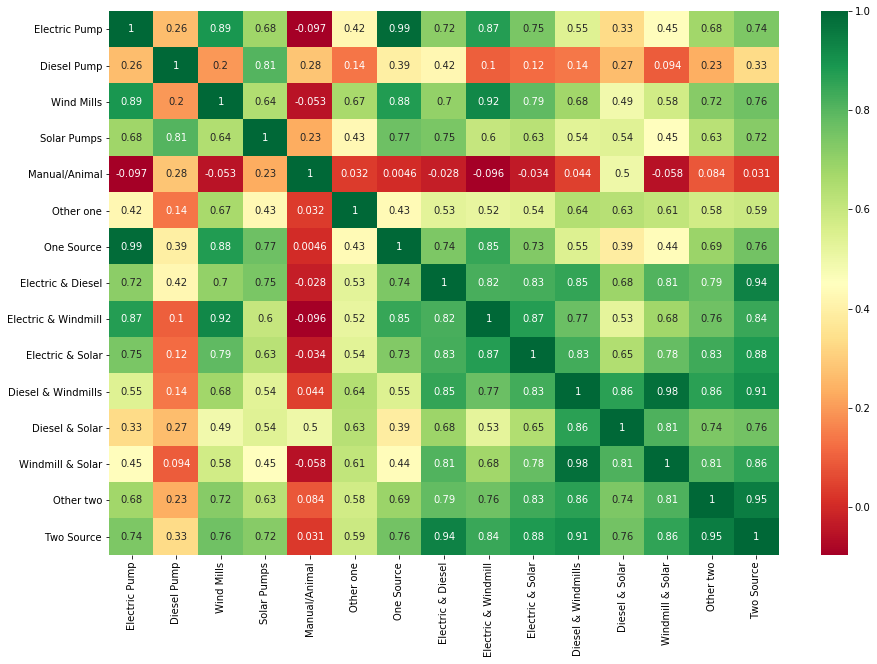

In [110]:
corr = dugwell_energy.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
# plot heat map
g=sns.heatmap(dugwell_energy[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# saving the plotted graph in plot directory
name = '/heatmap_energy.png'
plt.savefig(plots+name)

In [111]:
dugwell_energy = dugwell_energy.drop(['Wind Mills'],axis=1)
dugwell_energy = dugwell_energy.drop(['One Source'],axis=1)
dugwell_energy = dugwell_energy.drop(['Electric & Windmill'],axis=1)
dugwell_energy = dugwell_energy.drop(['Solar Pumps'],axis=1)
dugwell_energy = dugwell_energy.drop(['Two Source'],axis=1)
dugwell_energy = dugwell_energy.drop(['Other two'],axis=1)
dugwell_energy = dugwell_energy.drop(['Windmill & Solar'],axis=1)
dugwell_energy = dugwell_energy.drop(['Diesel & Solar'],axis=1)
dugwell_energy = dugwell_energy.drop(['Diesel & Windmills'],axis=1)
dugwell_energy = dugwell_energy.drop(['Electric & Solar'],axis=1)

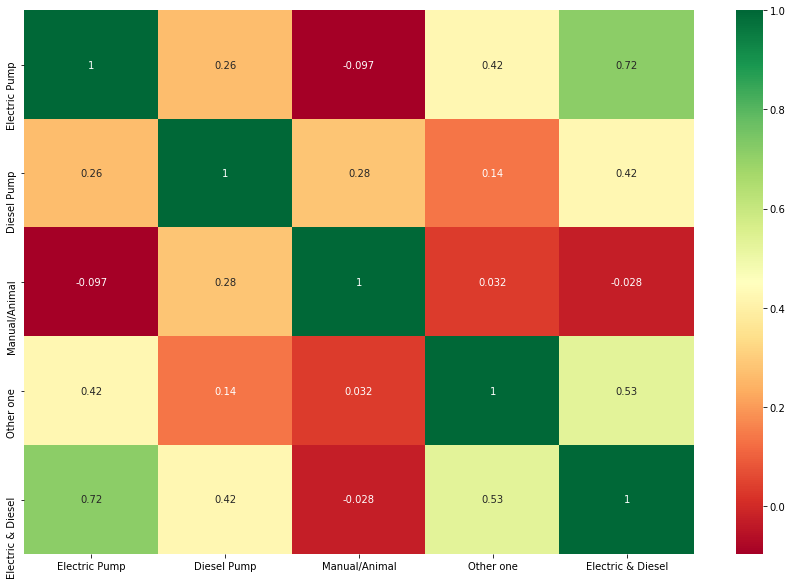

In [113]:
corr = dugwell_energy.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
# plot heat map
g=sns.heatmap(dugwell_energy[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# saving the plotted graph in plot directory
name = '/correlation_WindMills_ElecticPump_removed.png'
plt.savefig(plots+name)

C:\Users\Pratik Bangar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


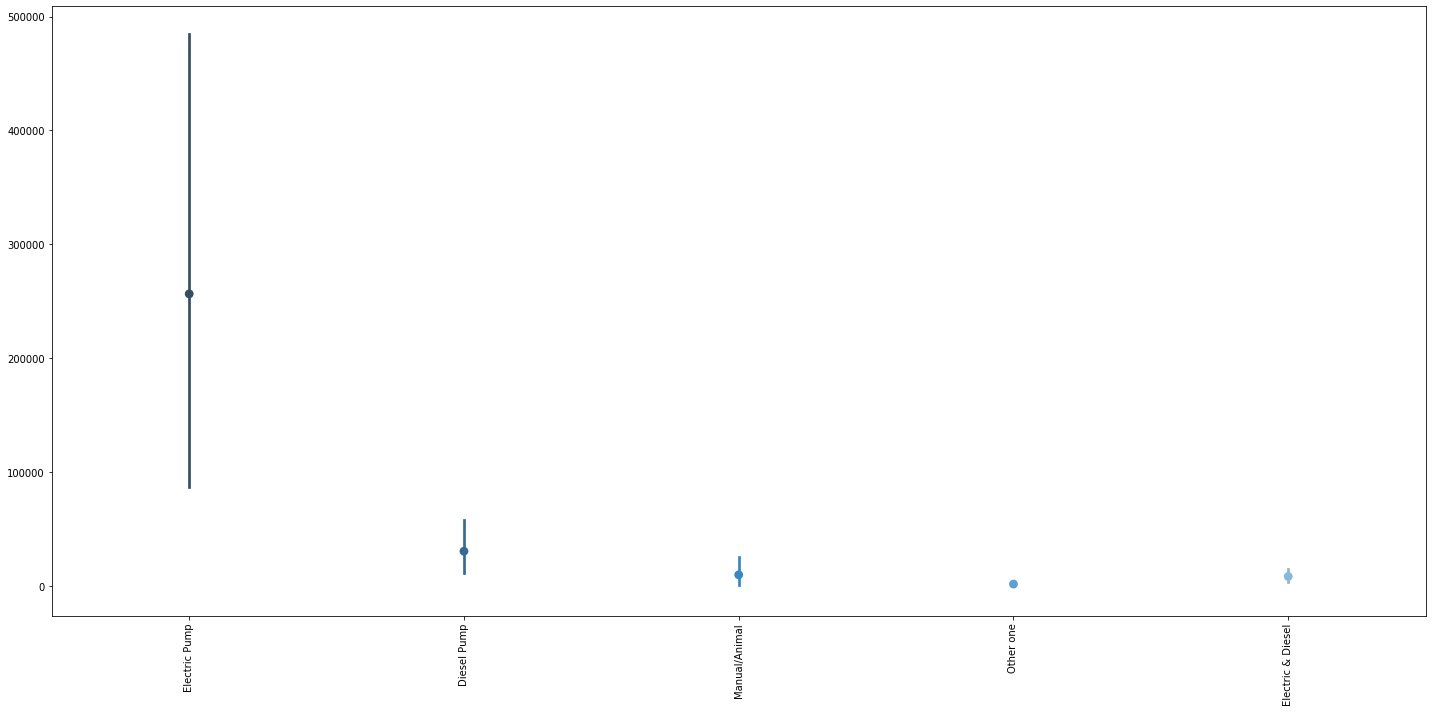

In [114]:
# categorical plot to observe the distribution of energy source data

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.factorplot(data = dugwell_energy,palette=("Blues_d"),ax=ax)
plt.close(2)

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/energy_cat_'+level+'.png'
plt.savefig(plots+name)

In [115]:
# adding data corresponding to data pump to the final dataset

final_dataset['Electric Pump'] = (dugwell_energy['Electric Pump']/final_dataset['Number']).astype(float)
final_dataset

,Depth,Number,OBC,Public or Group owned,Electric Pump,Own Savings
State,,,,,,
ANDAMAN & NICOBARS,0.013882,1334,0.327586,0.370315,0.477511,0.396552
ANDHRA PRADESH,0.095147,212030,0.465189,0.075197,0.405810,0.542277
ASSAM,0.609923,215,0.079070,0.400000,0.055814,0.418605
BIHAR,0.114603,22877,0.460156,0.174717,0.116361,0.107663
CHHATISGARH,0.079264,47611,0.393502,0.026254,0.809141,0.576085
GOA,0.000557,4673,0.208003,0.086882,0.673657,0.733362
GUJARAT,0.035731,932267,0.340874,0.011048,0.968214,0.385143
HARYANA,0.411132,28,0.000000,0.678571,0.785714,0.000000
HIMACHAL PRADESH,0.186183,664,0.271084,0.248494,0.823795,0.341867


## Data for funding source of dugwells at each level - <font color = blue>*dataf*</font>

In [116]:
# reading the data for the number of dugwells in each source of funding at each level

data_1 = pd.read_csv(fund_govt)
dataf = data_1.groupby(level)['With one source of Finance - Bank loan','With one source of Finance - Govt. Fund','With one source of Finance - Own Saving','With one source of Finance - Money Lender','With one source of Finance - Others','With two Sources of finance - Own Saving & Bank Loan','With two Sources of finance - Own Saving & Govt Fund','With two Sources of finance - Own Saving & Money Lender','With two Sources of finance - Bank Loan & Govt Fund','With two Sources of finance - Bank Loan & Money Lender','With two Sources of finance - Govt Fund & Money Lender','With two Sources of finance - Others'].sum()

dataf.columns = ['Bank loan','Govt Fund','Own Saving','Money Lender','One Source','Own Saving & Bank Loan','Own Saving & Govt Fund','Own Saving & Money Lender','Bank Loan & Govt Fund','Bank Loan & Money Lender','Govt Fund & Money Lender','Two Source']
dataf

,Bank loan,Govt Fund,Own Saving,Money Lender,One Source,Own Saving & Bank Loan,Own Saving & Govt Fund,Own Saving & Money Lender,Bank Loan & Govt Fund,Bank Loan & Money Lender,Govt Fund & Money Lender,Two Source
State,,,,,,,,,,,,
ANDAMAN & NICOBARS,14,277,529,0,5,0,14,0,0,0,0,1
ANDHRA PRADESH,1220,2070,114979,1450,567,6523,1921,30464,506,125,133,36128
ASSAM,0,0,90,0,0,0,0,2,0,0,0,37
BIHAR,1448,223,2463,6,40,504,447,523,1712,79,18,11417
CHHATISGARH,616,1987,27428,7,598,4813,260,12,407,71,1,10161
GOA,178,167,3427,12,453,6,13,0,1,0,0,10
GUJARAT,48409,14144,359056,4064,485029,51,12,2,529,44,2,10625
HARYANA,0,0,0,0,0,0,0,0,0,0,0,9
HIMACHAL PRADESH,24,12,227,0,19,52,31,0,12,1,0,121


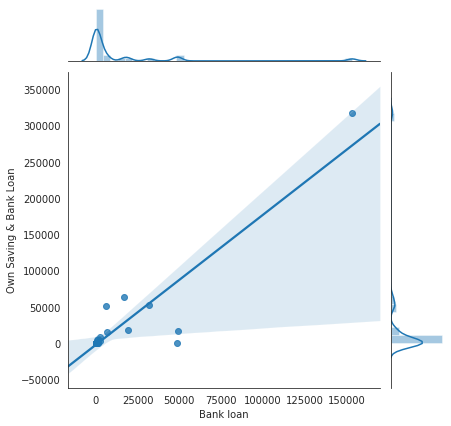

In [117]:
with sns.axes_style('white'):
    sns.jointplot('Bank loan', "Own Saving & Bank Loan", data=dataf, kind='reg')
# saving the plotted graph in plot directory
name = '/correlation_Savings.png'
plt.savefig(plots+name)

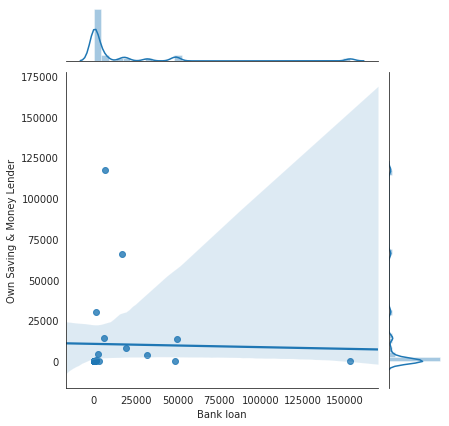

In [118]:
with sns.axes_style('white'):
    sns.jointplot('Bank loan', 'Own Saving & Money Lender', data=dataf, kind='reg')
# saving the plotted graph in plot directory
name = '/correlation_bankloan.png'
plt.savefig(plots+name)

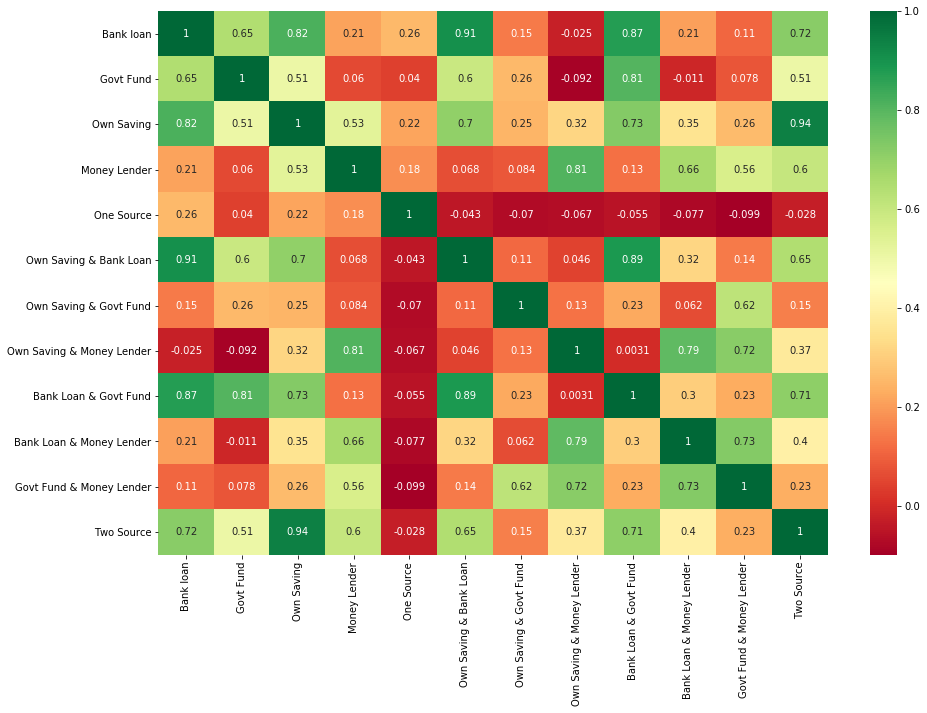

In [119]:
corr = dataf.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
# plot heat map
g=sns.heatmap(dataf[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# saving the plotted graph in plot directory
name = '/heatmap_funding.png'
plt.savefig(plots+name)

In [120]:
dataf = dataf.drop(['Own Saving & Bank Loan'],axis=1)
dataf = dataf.drop(['Bank Loan & Govt Fund'],axis=1)
dataf = dataf.drop(['Two Source'],axis=1)
dataf = dataf.drop(['Own Saving & Money Lender'],axis=1)
dataf = dataf.drop(['Bank loan'],axis=1)

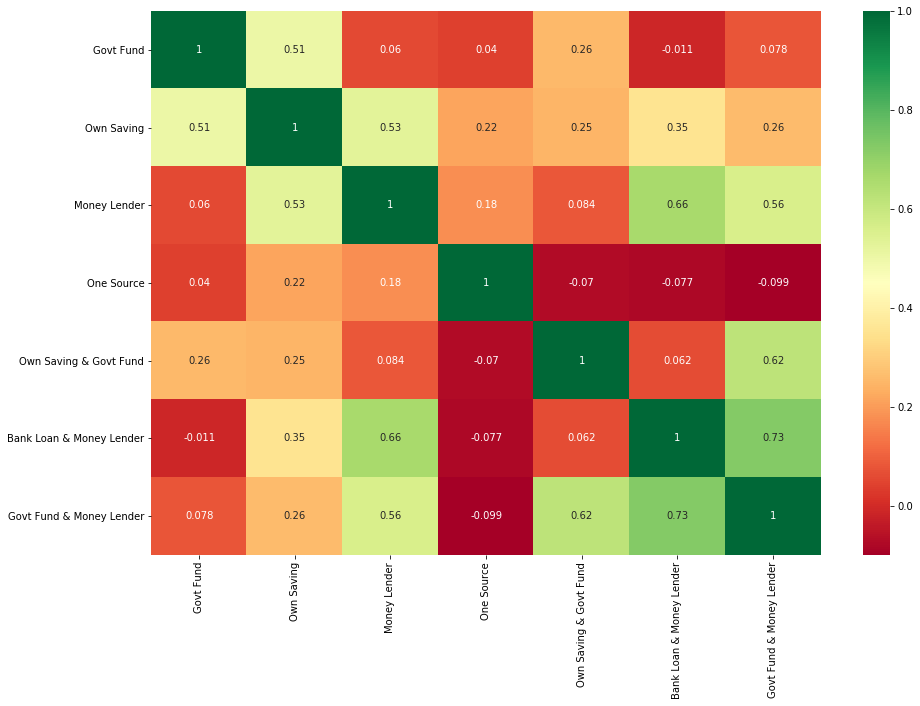

In [122]:
corr = dataf.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
# plot heat map
g=sns.heatmap(dataf[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# saving the plotted graph in plot directory
name = '/heatmap_funding_energy.png'
plt.savefig(plots+name)

C:\Users\Pratik Bangar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


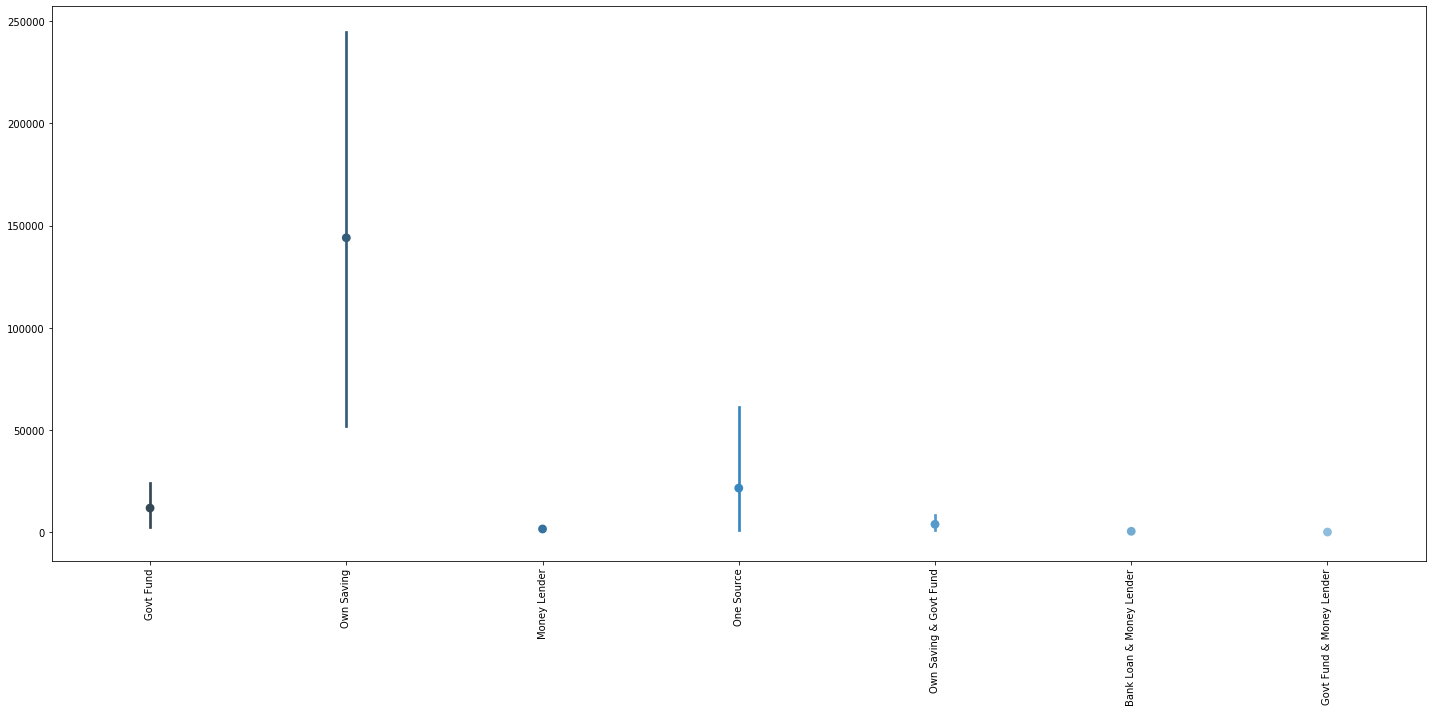

In [123]:
# categorical plot to observe the distribution of funding source data

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.factorplot(data = dataf,palette=("Blues_d"),ax=ax)
plt.ylabel('Number of Dugwells')
plt.close(2)

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/funding_cat_'+level+'.png'
plt.savefig(plots+name)

In [124]:
#adding data corresponding to own savings to the final dataset

final_dataset['Own Savings'] = (dataf['Own Saving']/final_dataset['Number']).astype(float)
final_dataset

,Depth,Number,OBC,Public or Group owned,Electric Pump,Own Savings
State,,,,,,
ANDAMAN & NICOBARS,0.013882,1334,0.327586,0.370315,0.477511,0.396552
ANDHRA PRADESH,0.095147,212030,0.465189,0.075197,0.405810,0.542277
ASSAM,0.609923,215,0.079070,0.400000,0.055814,0.418605
BIHAR,0.114603,22877,0.460156,0.174717,0.116361,0.107663
CHHATISGARH,0.079264,47611,0.393502,0.026254,0.809141,0.576085
GOA,0.000557,4673,0.208003,0.086882,0.673657,0.733362
GUJARAT,0.035731,932267,0.340874,0.011048,0.968214,0.385143
HARYANA,0.411132,28,0.000000,0.678571,0.785714,0.000000
HIMACHAL PRADESH,0.186183,664,0.271084,0.248494,0.823795,0.341867


## <font color = red>*Normalization*</font> of Depth Coulmn

In [125]:
max_depth = final_dataset['Depth'].max()
min_depth = final_dataset['Depth'].min()
diff = max_depth - min_depth

In [126]:
final_dataset['Depth'] = (final_dataset['Depth']-min_depth)/diff

In [127]:
final_dataset

,Depth,Number,OBC,Public or Group owned,Electric Pump,Own Savings
State,,,,,,
ANDAMAN & NICOBARS,0.013882,1334,0.327586,0.370315,0.477511,0.396552
ANDHRA PRADESH,0.095147,212030,0.465189,0.075197,0.405810,0.542277
ASSAM,0.609923,215,0.079070,0.400000,0.055814,0.418605
BIHAR,0.114603,22877,0.460156,0.174717,0.116361,0.107663
CHHATISGARH,0.079264,47611,0.393502,0.026254,0.809141,0.576085
GOA,0.000557,4673,0.208003,0.086882,0.673657,0.733362
GUJARAT,0.035731,932267,0.340874,0.011048,0.968214,0.385143
HARYANA,0.411132,28,0.000000,0.678571,0.785714,0.000000
HIMACHAL PRADESH,0.186183,664,0.271084,0.248494,0.823795,0.341867


## Removal of <font color=red> *Missing data rows* </font>

In [128]:
final_dataset = final_dataset[np.isfinite(final_dataset['Own Savings'])]
final_dataset = final_dataset[np.isfinite(final_dataset['OBC'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Depth'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Own Savings'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Public or Group owned'])]

In [129]:
data_set_final = final_dataset.drop(['Number'],axis = 1)

In [130]:
# final data set
data_set_final

,Depth,OBC,Public or Group owned,Electric Pump,Own Savings
State,,,,,
ANDAMAN & NICOBARS,0.013882,0.327586,0.370315,0.477511,0.396552
ANDHRA PRADESH,0.095147,0.465189,0.075197,0.405810,0.542277
ASSAM,0.609923,0.079070,0.400000,0.055814,0.418605
BIHAR,0.114603,0.460156,0.174717,0.116361,0.107663
CHHATISGARH,0.079264,0.393502,0.026254,0.809141,0.576085
GOA,0.000557,0.208003,0.086882,0.673657,0.733362
GUJARAT,0.035731,0.340874,0.011048,0.968214,0.385143
HARYANA,0.411132,0.000000,0.678571,0.785714,0.000000
HIMACHAL PRADESH,0.186183,0.271084,0.248494,0.823795,0.341867


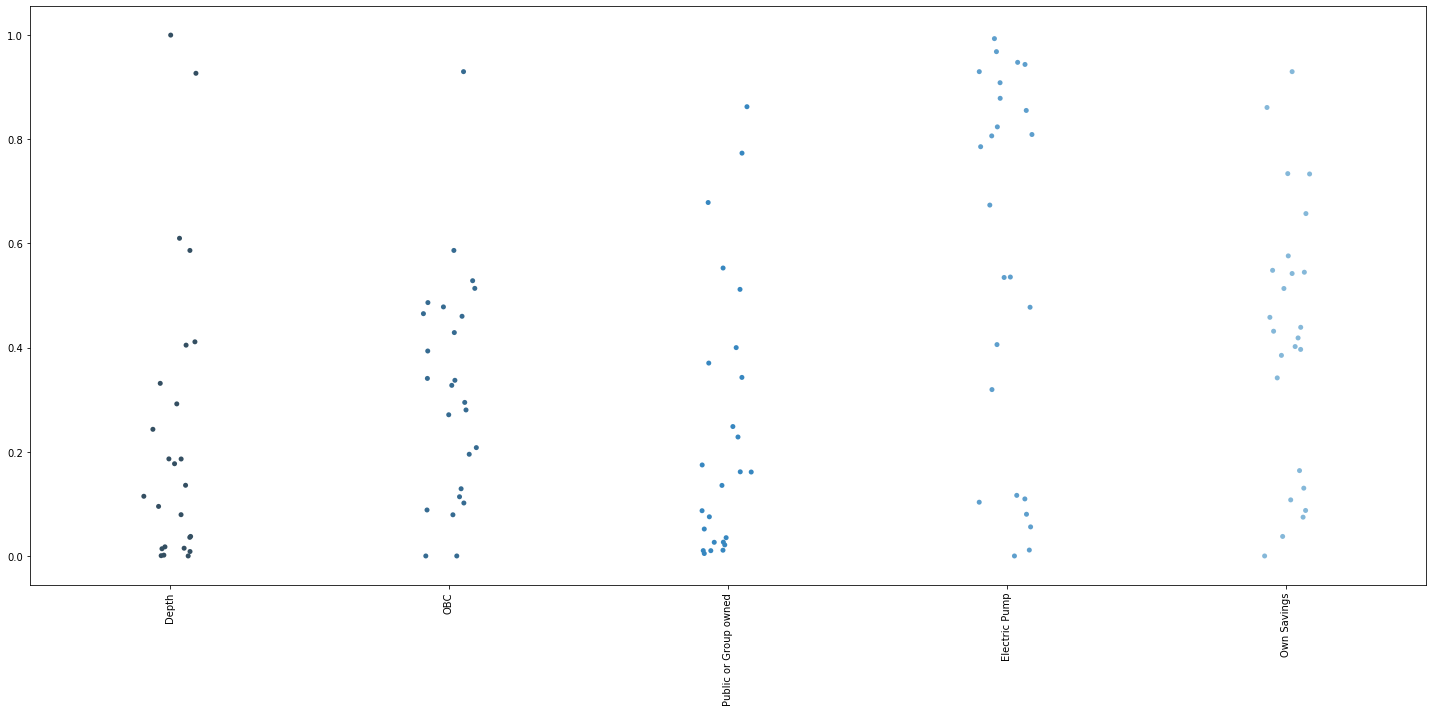

In [131]:
#categorical plot for final dataset

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.catplot(data = data_set_final,palette=("Blues_d"),ax=ax)
plt.close(2)

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/final_cat_'+level+'.png'
plt.savefig(plots+name)

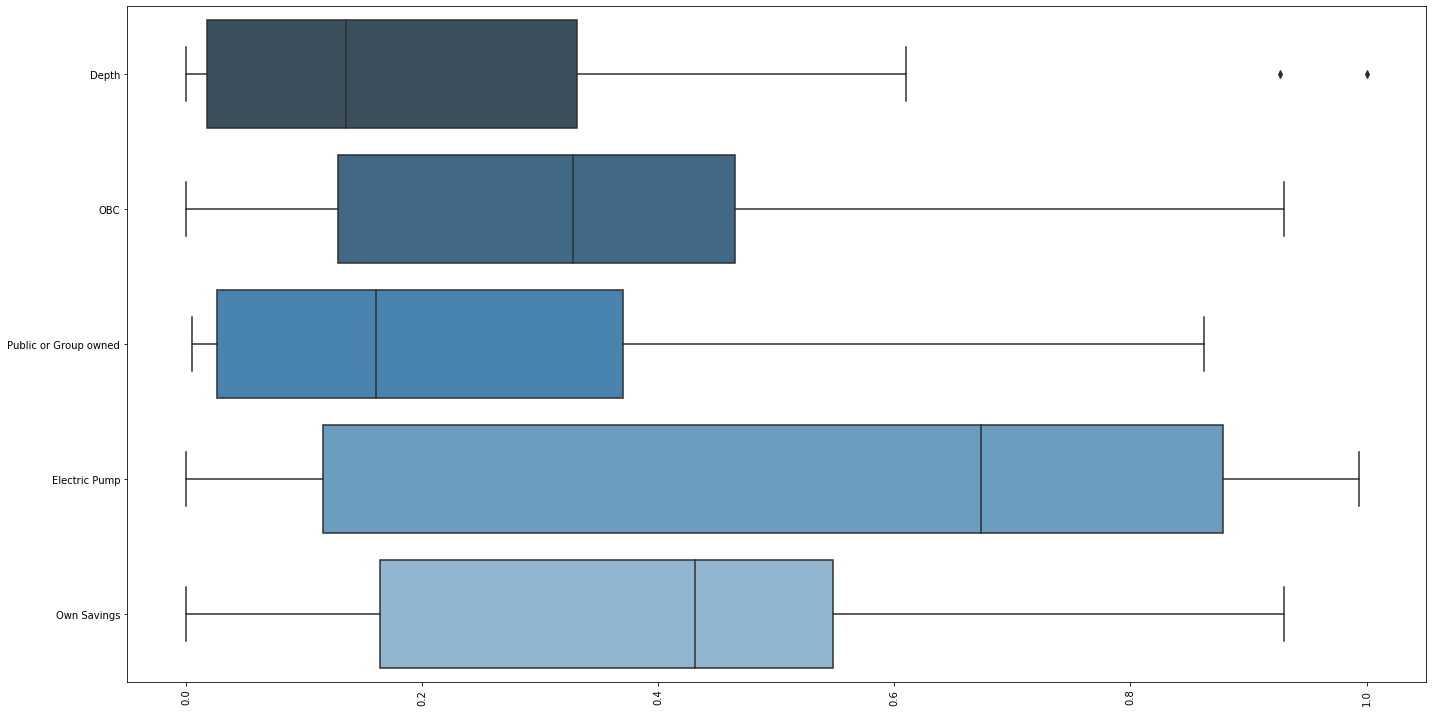

In [132]:
# Categorical Box PLot for final dataset

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.catplot(data = data_set_final,palette=("Blues_d"),ax=ax,kind='box',orient='h')
plt.close(2)

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/final_cat_box_'+level+'.png'
plt.savefig(plots+name)

In [141]:
data_set_final.to_csv(data_set+'/ClusterDataset.csv')

# TO BE CONTINUED....